In [1]:
# table https://colab.research.google.com/drive/1LO7mJBnkccfwlKUFX17rJONbf_tUEukC?usp=sharing
# game Pong 18.9 (1.3)

In [2]:
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from collections import deque
from utils import DQNbn, make_env, ReplayMemory, train
%matplotlib inline

In [3]:
env = gym.make("PongNoFrameskip-v4")

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


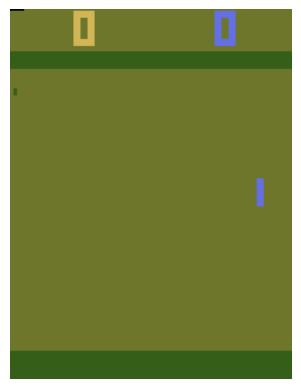

In [4]:
plt.imshow(env.reset()[0])
plt.axis('off')  # Убрать оси координат
plt.show()

In [5]:
env.reset()

n_actions = env.action_space.n
state_dim = env.observation_space.shape

print(f'Action_space: {n_actions} \nState_space: {env.observation_space.shape}')

env.close()

Action_space: 6 
State_space: (210, 160, 3)


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [7]:
BATCH_SIZE = 128
GAMMA = 0.99
EPS_START = 1
EPS_END = 0.02
EPS_DECAY = 1000000
TARGET_UPDATE = 1000
RENDER = False
lr = 1e-4
INITIAL_MEMORY = 1000
MEMORY_SIZE = 10 * INITIAL_MEMORY

In [8]:
policy_net = DQNbn(n_actions=6).to(device)
target_net = DQNbn(n_actions=6).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = torch.optim.Adam(policy_net.parameters(), lr=lr)

steps_done = 0

# create environment
env = gym.make("PongNoFrameskip-v4")
env = make_env(env)

memory = ReplayMemory(MEMORY_SIZE)

In [9]:
train(
    env=env, 
    n_episodes=400,
    memory=memory, 
    device=device, 
    initial_memory=INITIAL_MEMORY, 
    policy_net=policy_net, 
    target_net=target_net, 
    gamma=GAMMA, 
    optimizer=optimizer, 
    batch_size=BATCH_SIZE, 
    target_update=TARGET_UPDATE, 
    eps_end=EPS_END, 
    eps_start=EPS_START, 
    eps_decay=EPS_DECAY,
    render=False,
)
# torch.save(policy_net, "dqn_pong_model")
# policy_net = torch.load("dqn_pong_model")


  0%|          | 1/400 [00:02<14:42,  2.21s/it]

Total steps: 820 	 Episode: 0/819 	 Total reward: -21.0


  2%|▏         | 6/400 [00:07<07:04,  1.08s/it]

Total steps: 5701 	 Episode: 5/962 	 Total reward: -21.0


  3%|▎         | 11/400 [00:11<06:27,  1.00it/s]

Total steps: 10114 	 Episode: 10/841 	 Total reward: -21.0


  4%|▍         | 16/400 [00:16<06:18,  1.02it/s]

Total steps: 14535 	 Episode: 15/949 	 Total reward: -21.0


  5%|▌         | 21/400 [00:21<06:08,  1.03it/s]

Total steps: 19121 	 Episode: 20/760 	 Total reward: -21.0


  6%|▋         | 26/400 [00:26<05:42,  1.09it/s]

Total steps: 23620 	 Episode: 25/954 	 Total reward: -20.0


  8%|▊         | 31/400 [00:31<05:58,  1.03it/s]

Total steps: 27919 	 Episode: 30/815 	 Total reward: -21.0


  9%|▉         | 36/400 [00:37<06:57,  1.15s/it]

Total steps: 32695 	 Episode: 35/905 	 Total reward: -21.0


 10%|█         | 41/400 [00:43<06:59,  1.17s/it]

Total steps: 37432 	 Episode: 40/1023 	 Total reward: -18.0


 12%|█▏        | 46/400 [00:48<06:54,  1.17s/it]

Total steps: 41864 	 Episode: 45/1027 	 Total reward: -19.0


 13%|█▎        | 51/400 [00:54<07:15,  1.25s/it]

Total steps: 46786 	 Episode: 50/996 	 Total reward: -20.0


 14%|█▍        | 56/400 [01:00<06:30,  1.13s/it]

Total steps: 51229 	 Episode: 55/946 	 Total reward: -19.0


 15%|█▌        | 61/400 [01:06<06:30,  1.15s/it]

Total steps: 55767 	 Episode: 60/841 	 Total reward: -21.0


 16%|█▋        | 66/400 [01:12<06:24,  1.15s/it]

Total steps: 60533 	 Episode: 65/757 	 Total reward: -21.0


 18%|█▊        | 71/400 [01:17<06:08,  1.12s/it]

Total steps: 65011 	 Episode: 70/905 	 Total reward: -21.0


 19%|█▉        | 76/400 [01:23<06:15,  1.16s/it]

Total steps: 69460 	 Episode: 75/837 	 Total reward: -20.0


 20%|██        | 81/400 [01:29<06:35,  1.24s/it]

Total steps: 74418 	 Episode: 80/926 	 Total reward: -20.0


 22%|██▏       | 86/400 [01:35<06:01,  1.15s/it]

Total steps: 78844 	 Episode: 85/838 	 Total reward: -21.0


 23%|██▎       | 91/400 [01:41<05:55,  1.15s/it]

Total steps: 83319 	 Episode: 90/780 	 Total reward: -21.0


 24%|██▍       | 96/400 [01:46<05:19,  1.05s/it]

Total steps: 88032 	 Episode: 95/803 	 Total reward: -21.0


 25%|██▌       | 101/400 [01:51<05:20,  1.07s/it]

Total steps: 92434 	 Episode: 100/1001 	 Total reward: -20.0


 26%|██▋       | 106/400 [01:57<05:04,  1.04s/it]

Total steps: 96909 	 Episode: 105/869 	 Total reward: -20.0


 28%|██▊       | 111/400 [02:01<04:23,  1.10it/s]

Total steps: 101312 	 Episode: 110/803 	 Total reward: -21.0


 29%|██▉       | 116/400 [02:07<04:52,  1.03s/it]

Total steps: 106180 	 Episode: 115/1092 	 Total reward: -19.0


 30%|███       | 121/400 [02:11<04:26,  1.05it/s]

Total steps: 110704 	 Episode: 120/759 	 Total reward: -21.0


 32%|███▏      | 126/400 [02:17<04:45,  1.04s/it]

Total steps: 115298 	 Episode: 125/959 	 Total reward: -21.0


 33%|███▎      | 131/400 [02:22<04:19,  1.04it/s]

Total steps: 119597 	 Episode: 130/833 	 Total reward: -20.0


 34%|███▍      | 136/400 [02:27<04:21,  1.01it/s]

Total steps: 124088 	 Episode: 135/911 	 Total reward: -21.0


 35%|███▌      | 141/400 [02:31<03:59,  1.08it/s]

Total steps: 128389 	 Episode: 140/834 	 Total reward: -20.0


 36%|███▋      | 146/400 [02:37<04:27,  1.05s/it]

Total steps: 132758 	 Episode: 145/880 	 Total reward: -21.0


 38%|███▊      | 151/400 [02:43<04:52,  1.17s/it]

Total steps: 137501 	 Episode: 150/991 	 Total reward: -20.0


 39%|███▉      | 156/400 [02:48<04:26,  1.09s/it]

Total steps: 141632 	 Episode: 155/895 	 Total reward: -20.0


 40%|████      | 161/400 [02:53<03:52,  1.03it/s]

Total steps: 145742 	 Episode: 160/757 	 Total reward: -21.0


 42%|████▏     | 166/400 [02:58<03:49,  1.02it/s]

Total steps: 150198 	 Episode: 165/1025 	 Total reward: -18.0


 43%|████▎     | 171/400 [03:03<04:26,  1.16s/it]

Total steps: 154895 	 Episode: 170/899 	 Total reward: -21.0


 44%|████▍     | 176/400 [03:08<03:34,  1.05it/s]

Total steps: 159224 	 Episode: 175/785 	 Total reward: -21.0


 45%|████▌     | 181/400 [03:14<04:05,  1.12s/it]

Total steps: 163589 	 Episode: 180/1022 	 Total reward: -21.0


 46%|████▋     | 186/400 [03:19<03:57,  1.11s/it]

Total steps: 167996 	 Episode: 185/876 	 Total reward: -21.0


 48%|████▊     | 191/400 [03:25<04:00,  1.15s/it]

Total steps: 172473 	 Episode: 190/864 	 Total reward: -21.0


 49%|████▉     | 196/400 [03:31<03:55,  1.15s/it]

Total steps: 177111 	 Episode: 195/833 	 Total reward: -20.0


 50%|█████     | 201/400 [03:36<03:30,  1.06s/it]

Total steps: 181129 	 Episode: 200/757 	 Total reward: -21.0


 52%|█████▏    | 206/400 [03:42<03:30,  1.09s/it]

Total steps: 185378 	 Episode: 205/761 	 Total reward: -21.0


 53%|█████▎    | 211/400 [03:48<03:22,  1.07s/it]

Total steps: 189552 	 Episode: 210/817 	 Total reward: -21.0


 54%|█████▍    | 216/400 [03:54<03:41,  1.20s/it]

Total steps: 194075 	 Episode: 215/879 	 Total reward: -20.0


 55%|█████▌    | 221/400 [03:59<03:24,  1.14s/it]

Total steps: 198157 	 Episode: 220/837 	 Total reward: -21.0


 56%|█████▋    | 226/400 [04:05<03:11,  1.10s/it]

Total steps: 202444 	 Episode: 225/914 	 Total reward: -20.0


 58%|█████▊    | 231/400 [04:11<03:19,  1.18s/it]

Total steps: 206940 	 Episode: 230/1103 	 Total reward: -20.0


 59%|█████▉    | 236/400 [04:17<03:25,  1.26s/it]

Total steps: 211385 	 Episode: 235/948 	 Total reward: -21.0


 60%|██████    | 241/400 [04:22<03:03,  1.16s/it]

Total steps: 216067 	 Episode: 240/972 	 Total reward: -20.0


 62%|██████▏   | 246/400 [04:28<02:59,  1.17s/it]

Total steps: 220968 	 Episode: 245/939 	 Total reward: -21.0


 63%|██████▎   | 251/400 [04:34<02:57,  1.19s/it]

Total steps: 225934 	 Episode: 250/876 	 Total reward: -21.0


 64%|██████▍   | 256/400 [04:40<02:43,  1.14s/it]

Total steps: 230678 	 Episode: 255/903 	 Total reward: -21.0


 65%|██████▌   | 261/400 [04:46<02:32,  1.10s/it]

Total steps: 234739 	 Episode: 260/821 	 Total reward: -21.0


 66%|██████▋   | 266/400 [04:52<02:33,  1.14s/it]

Total steps: 239293 	 Episode: 265/847 	 Total reward: -21.0


 68%|██████▊   | 271/400 [04:58<02:36,  1.21s/it]

Total steps: 243762 	 Episode: 270/928 	 Total reward: -20.0


 69%|██████▉   | 276/400 [05:04<02:30,  1.22s/it]

Total steps: 248331 	 Episode: 275/818 	 Total reward: -21.0


 70%|███████   | 281/400 [05:10<02:22,  1.20s/it]

Total steps: 252706 	 Episode: 280/1124 	 Total reward: -20.0


 72%|███████▏  | 286/400 [05:15<01:57,  1.03s/it]

Total steps: 256740 	 Episode: 285/759 	 Total reward: -21.0


 73%|███████▎  | 291/400 [05:20<02:02,  1.13s/it]

Total steps: 261224 	 Episode: 290/1036 	 Total reward: -18.0


 74%|███████▍  | 296/400 [05:26<02:07,  1.23s/it]

Total steps: 265901 	 Episode: 295/1018 	 Total reward: -20.0


 75%|███████▌  | 301/400 [05:31<01:32,  1.08it/s]

Total steps: 270054 	 Episode: 300/754 	 Total reward: -21.0


 76%|███████▋  | 306/400 [05:38<01:43,  1.11s/it]

Total steps: 275261 	 Episode: 305/1145 	 Total reward: -19.0


KeyboardInterrupt: 